# 1)Data collection

In [384]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2

### Read the Data Table

In [385]:
dataset = pd.read_csv(r"C:\Users\hp\Downloads\elec.csv")
dataset.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,376892,482,377374,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,318665,149,318814,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,314057,181,314238,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,644459,2416,646875,1937690


- The data is about the 2019 India general election candidates and the votes obatined

In [386]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   SYMBOL          2018 non-null   object 
 6   GENDER          2018 non-null   object 
 7   CRIMINAL
CASES  2018 non-null   object 
 8   AGE             2018 non-null   float64
 9   CATEGORY        2018 non-null   object 
 10  EDUCATION       2018 non-null   object 
 11  GENERAL
VOTES   2263 non-null   int64  
 12  POSTAL
VOTES    2263 non-null   int64  
 13  TOTAL
VOTES     2263 non-null   int64  
 14  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 265.3+ KB


### Renaming invalid column names

- fixing the incorrect column names and replace all the spaces in column names with underscores (‘_’) for easy data manipulation in the later stages

In [387]:
dataset = dataset.rename(columns={'CRIMINAL\nCASES': 'CRIMINAL_CASES', 'GENERAL\nVOTES': 'GENERAL_VOTES', 'POSTAL\nVOTES': 'POSTAL_VOTES', 'TOTAL\nVOTES': 'TOTAL_VOTES','TOTAL ELECTORS': 'TOTAL_ELECTORS'})

In [388]:
dataset.describe()

,WINNER,AGE,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,TOTAL_ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,3.150313e+06


# 2)Pre-processing

### Checking for missing values

In [389]:
dataset.isna().sum()

STATE               0
CONSTITUENCY        0
NAME                0
WINNER              0
PARTY               0
SYMBOL            245
GENDER            245
CRIMINAL_CASES    245
AGE               245
CATEGORY          245
EDUCATION         245
GENERAL_VOTES       0
POSTAL_VOTES        0
TOTAL_VOTES         0
TOTAL_ELECTORS      0
dtype: int64

- Almost 10 percentage of the data seems missing

### Some data cleaning and manipulation

- Drop rows with NA values

In [390]:
dataset = dataset[dataset['GENDER'].notna()]

### Replacing Nil values with 0

In [391]:
dataset['CRIMINAL_CASES'] = dataset['CRIMINAL_CASES'].replace(['Not Available'], '0')

- Cleaning column values. removing unwanted symbols ans new line charachters from the table

In [392]:
dataset['CRIMINAL_CASES'] = dataset['CRIMINAL_CASES'].astype(str).astype(int)

In [393]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2261
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2018 non-null   object 
 1   CONSTITUENCY    2018 non-null   object 
 2   NAME            2018 non-null   object 
 3   WINNER          2018 non-null   int64  
 4   PARTY           2018 non-null   object 
 5   SYMBOL          2018 non-null   object 
 6   GENDER          2018 non-null   object 
 7   CRIMINAL_CASES  2018 non-null   int32  
 8   AGE             2018 non-null   float64
 9   CATEGORY        2018 non-null   object 
 10  EDUCATION       2018 non-null   object 
 11  GENERAL_VOTES   2018 non-null   int64  
 12  POSTAL_VOTES    2018 non-null   int64  
 13  TOTAL_VOTES     2018 non-null   int64  
 14  TOTAL_ELECTORS  2018 non-null   int64  
dtypes: float64(1), int32(1), int64(5), object(8)
memory usage: 244.4+ KB


In [394]:
dataset.isna().sum()

STATE             0
CONSTITUENCY      0
NAME              0
WINNER            0
PARTY             0
SYMBOL            0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
GENERAL_VOTES     0
POSTAL_VOTES      0
TOTAL_VOTES       0
TOTAL_ELECTORS    0
dtype: int64

In [395]:
dataset.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,376892,482,377374,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,318665,149,318814,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,314057,181,314238,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,644459,2416,646875,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,434199,1130,435329,1937690


- The data set is somewhat better than the raw form. we filled missing values and cleaned it for further analysis

### Outliers detection and handling


#### a)AGE

Text(0.5, 1.0, 'Boxplot of Age')

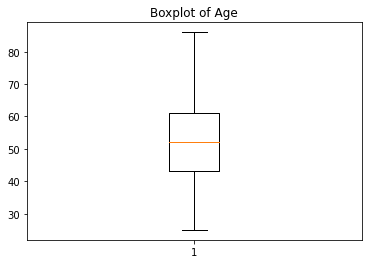

In [396]:
plt.boxplot(dataset["AGE"])
plt.title("Boxplot of Age")

There is no outliers

#### b)TOTAL_ELECTORS

Text(0.5, 1.0, 'Boxplot of TOTAL_ELECTORS')

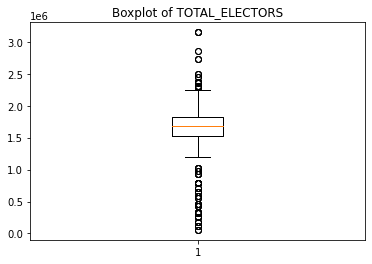

In [397]:
plt.boxplot(dataset["TOTAL_ELECTORS"])
plt.title("Boxplot of TOTAL_ELECTORS")

In [398]:
Q1=np.percentile(dataset["TOTAL_ELECTORS"],25,interpolation="midpoint")
Q2=np.percentile(dataset["TOTAL_ELECTORS"],50,interpolation="midpoint")
Q3=np.percentile(dataset["TOTAL_ELECTORS"],75,interpolation="midpoint")
print(Q1,Q2,Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["TOTAL_ELECTORS"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x) 
outlier        

1530404.0 1679891.0 1823144.5


[318471,
 318471,
 318471,
 318471,
 318471,
 339788,
 339788,
 339788,
 339788,
 339788,
 463775,
 463775,
 463775,
 463775,
 463775,
 795945,
 795945,
 795945,
 795945,
 795945,
 2849250,
 2849250,
 2497458,
 2497458,
 2497458,
 646729,
 646729,
 646729,
 646729,
 2443112,
 2443112,
 2443112,
 250029,
 250029,
 250029,
 250029,
 250029,
 250029,
 121740,
 121740,
 121740,
 2302960,
 2302960,
 2302960,
 2728978,
 2728978,
 2728978,
 2350580,
 2350580,
 937464,
 937464,
 937464,
 937464,
 937464,
 179232,
 179232,
 179232,
 179232,
 55189,
 55189,
 55189,
 3150313,
 3150313,
 3150313,
 3150313,
 2298080,
 2298080,
 2298080,
 792464,
 792464,
 792464,
 792464,
 792464,
 2290492,
 2290492,
 2290492,
 2290492,
 556761,
 556761,
 556761,
 2378995,
 2378995,
 2378995,
 1022099,
 1022099,
 1022099,
 1022099,
 1022099,
 973410,
 973410,
 973410,
 973410,
 434128,
 434128,
 434128,
 434128,
 579352,
 579352,
 579352,
 2370903,
 2370903,
 2370903,
 716990,
 716990,
 716990,
 2371644,
 2371644,


In [399]:
median=float(np.median(dataset["TOTAL_ELECTORS"]))
for i in outlier:
    dataset.loc[dataset["TOTAL_ELECTORS"]==i,"TOTAL_ELECTORS"]=np.nan
dataset["TOTAL_ELECTORS"].fillna(median,inplace=True)

Text(0.5, 1.0, 'Boxplot of TOTAL_ELECTORS')

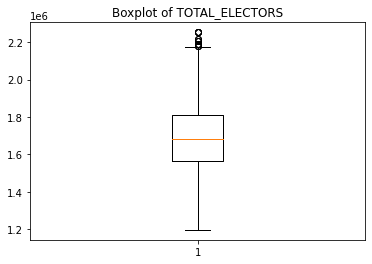

In [400]:
plt.boxplot(dataset["TOTAL_ELECTORS"])
plt.title("Boxplot of TOTAL_ELECTORS")

#### c)POSTAL_VOTES

Text(0.5, 1.0, 'Boxplot of POSTAL_VOTES ')

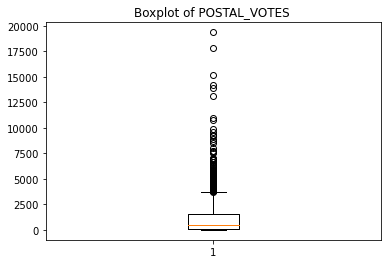

In [401]:
plt.boxplot(dataset["POSTAL_VOTES"])
plt.title("Boxplot of POSTAL_VOTES ")

In [402]:
Q1=np.percentile(dataset["POSTAL_VOTES"],25,interpolation="midpoint")
Q2=np.percentile(dataset["POSTAL_VOTES"],50,interpolation="midpoint")
Q3=np.percentile(dataset["POSTAL_VOTES"],75,interpolation="midpoint")
print(Q1,Q2,Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outlier=[]
for x in dataset["POSTAL_VOTES"]:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x) 
outlier        

97.0 463.0 1545.0


[7699,
 3822,
 4024,
 3985,
 4410,
 14196,
 9621,
 3955,
 4307,
 5502,
 4370,
 6374,
 4629,
 5316,
 9302,
 6158,
 5075,
 6007,
 4789,
 4171,
 4616,
 5005,
 4091,
 4564,
 6699,
 6001,
 4704,
 10974,
 4125,
 4363,
 3785,
 5467,
 4147,
 6426,
 5410,
 6678,
 3975,
 4662,
 4353,
 4699,
 4433,
 19367,
 5726,
 7542,
 4305,
 13880,
 4624,
 4500,
 6863,
 4252,
 4609,
 5593,
 8506,
 4738,
 4156,
 4364,
 17852,
 4004,
 4087,
 15169,
 7722,
 4315,
 5281,
 5532,
 4752,
 3917,
 13085,
 4179,
 3980,
 3905,
 5145,
 5258,
 8748,
 3951,
 3833,
 4245,
 3869,
 4555,
 7022,
 4658,
 4520,
 5864,
 3900,
 5048,
 4858,
 3728,
 6816,
 5688,
 9858,
 8064,
 5035,
 4327,
 9332,
 5113,
 4835,
 6692,
 3870,
 6934,
 4217,
 4349,
 7603,
 5486,
 4161,
 3849,
 5380,
 4877,
 10772,
 4275,
 5779,
 5331,
 5331,
 6960,
 4887,
 9213,
 5810,
 5357,
 5618,
 5404,
 4953,
 3896,
 4553,
 3854,
 8905,
 6216,
 4952]

In [403]:
median=float(np.median(dataset["POSTAL_VOTES"]))
for i in outlier:
    dataset.loc[dataset["POSTAL_VOTES"]==i,"POSTAL_VOTES"]=np.nan
dataset["POSTAL_VOTES"].fillna(median,inplace=True)

Text(0.5, 1.0, 'Boxplot of POSTAL_VOTES ')

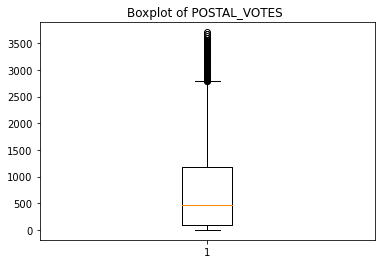

In [404]:
plt.boxplot(dataset["POSTAL_VOTES"])
plt.title("Boxplot of POSTAL_VOTES ")

#### d)GENERAL_VOTES

Text(0.5, 1.0, 'Boxplot of GENERAL_VOTES ')

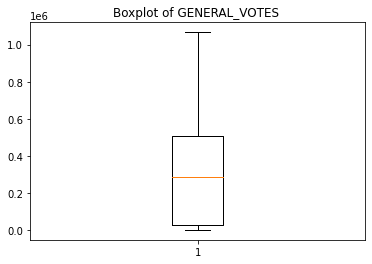

In [405]:
plt.boxplot(dataset["GENERAL_VOTES"])
plt.title("Boxplot of GENERAL_VOTES ")

There is no outliers are present

### Encoding

- encoding the non-numerical columns to numerical columns using sklearn LabelEncoder.

In [406]:
lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['SYMBOL'])
dataset['SYMBOL'] = lblEncoder_symbol.transform(dataset['SYMBOL'])

lblEncoder_gender = LabelEncoder()
lblEncoder_gender.fit(dataset['GENDER'])
dataset['GENDER'] = lblEncoder_gender.transform(dataset['GENDER'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['CATEGORY'])
dataset['CATEGORY'] = lblEncoder_category.transform(dataset['CATEGORY'])

In [407]:
dataset.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,80,1,52,52.0,2,12th Pass,376892,482.0,377374,1489790.0
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,32,1,0,54.0,2,Post Graduate,318665,149.0,318814,1489790.0
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,66,1,3,52.0,2,12th Pass,314057,181.0,314238,1489790.0
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,80,1,5,58.0,1,Doctorate,644459,2416.0,646875,1937690.0
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,49,1,0,47.0,1,Post Graduate,434199,1130.0,435329,1937690.0


# 3)Exploratory Data Analysis


### a)Univariant Analysis

[Text(0, 0, '1760'), Text(0, 0, '258')]

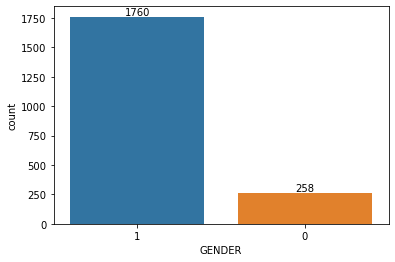

In [408]:
data1=sns.countplot(x=dataset["GENDER"],order=dataset['GENDER'].value_counts(ascending=False).index);
values = dataset['GENDER'].value_counts(ascending=False).values
data1.bar_label(container=data1.containers[0], labels=values)

                            *Total number of Male = 1760
                            *Total number of Female = 258

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Post Graduate'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'Graduate Professional'),
  Text(3, 0, '12th Pass'),
  Text(4, 0, '10th Pass'),
  Text(5, 0, '8th Pass'),
  Text(6, 0, 'Doctorate'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Literate'),
  Text(9, 0, '5th Pass'),
  Text(10, 0, 'Not Available'),
  Text(11, 0, 'Illiterate'),
  Text(12, 0, 'Post Graduate\n')])

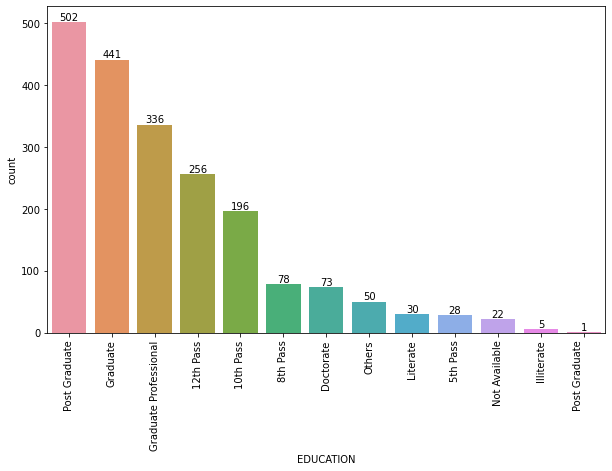

In [409]:
plt.figure(figsize=(10,6))
data1=sns.countplot(x=dataset["EDUCATION"],order=dataset['EDUCATION'].value_counts(ascending=False).index);
values = dataset['EDUCATION'].value_counts(ascending=False).values
data1.bar_label(container=data1.containers[0], labels=values)
plt.xticks(rotation=90)

### b)Bivariant Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

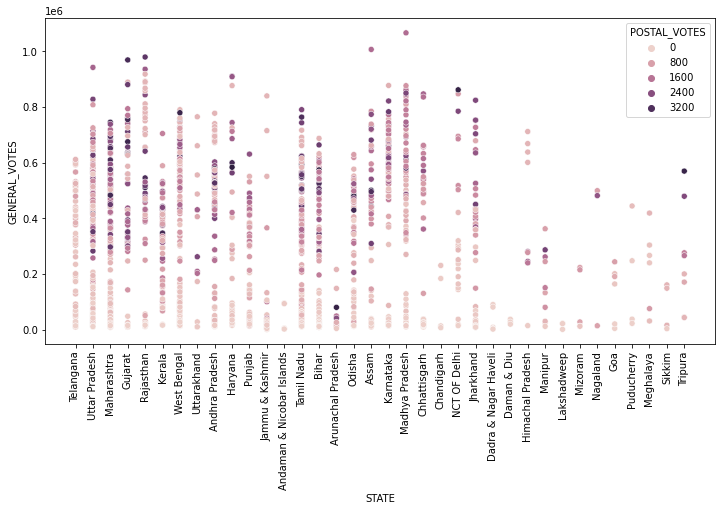

In [410]:
plt.figure(figsize=(12,6))
sns.scatterplot(dataset["STATE"],dataset["GENERAL_VOTES"],dataset["POSTAL_VOTES"])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

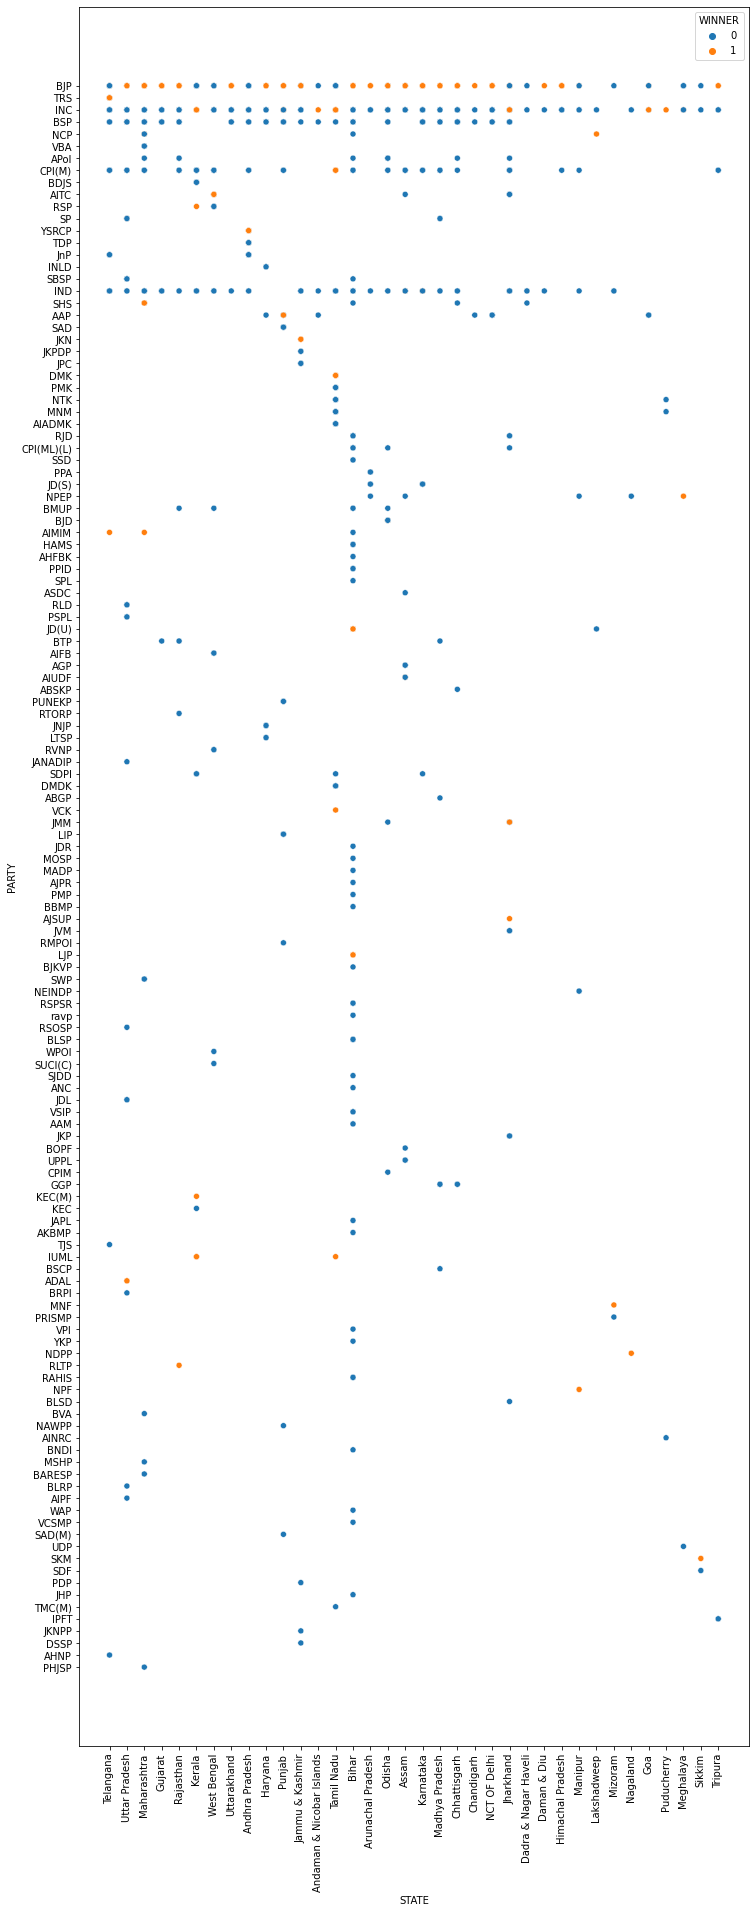

In [411]:
plt.figure(figsize=(12,32))
sns.scatterplot(dataset["STATE"],dataset["PARTY"],dataset["WINNER"])
plt.xticks(rotation=90)

# 4)Modelling

- K-Nearest Neighbors model is created and tested for its accuracy. KNN is a supervised machine learning model which is categorized under classification algorithms.

In [412]:
lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['STATE'])
dataset['STATE'] = lblEncoder_category.transform(dataset['STATE'])

lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['EDUCATION'])
dataset['EDUCATION'] = lblEncoder_symbol.transform(dataset['EDUCATION'])

lblEncoder_symbol = LabelEncoder()
lblEncoder_symbol.fit(dataset['NAME'])
dataset['NAME'] = lblEncoder_symbol.transform(dataset['NAME'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['CONSTITUENCY'])
dataset['CONSTITUENCY'] = lblEncoder_category.transform(dataset['CONSTITUENCY'])

lblEncoder_category = LabelEncoder()
lblEncoder_category.fit(dataset['PARTY'])
dataset['PARTY'] = lblEncoder_category.transform(dataset['PARTY'])


In [413]:
y = dataset["WINNER"]
X = dataset.drop(labels=["WINNER"], axis=1)

# splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### a)KNN

In [414]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.8589108910891089
F - score of the model:  0.8366982235932348
Precision score of the model:  0.8192249662510919
Recall score of the model:  0.8772522522522522
Confuion Matrix 
 [[248  48]
 [  9  99]]


### b)Logistic regression

In [415]:
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)

print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.8589108910891089
F - score of the model:  0.8366982235932348
Precision score of the model:  0.8192249662510919
Recall score of the model:  0.8772522522522522
Confuion Matrix 
 [[248  48]
 [  9  99]]


### c)Decision Tree

In [416]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.8613861386138614
F - score of the model:  0.8385291766586731
Precision score of the model:  0.8210470085470085
Recall score of the model:  0.8760010010010011
Confuion Matrix 
 [[250  46]
 [ 10  98]]


More accuracy in Random Forest tree

# 5)Fine tuning the model

- To improve the model accuracy, we are using a normalisation method. we are using MinMaxScaler from the scikit-learn library to scale down all the values into the 0–1 range.

In [417]:
scaler = MinMaxScaler(feature_range=(0, 1))
features = [
    'STATE', 'CONSTITUENCY', 'NAME', 'PARTY', 'SYMBOL', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY', 'EDUCATION', 'GENERAL_VOTES', 'POSTAL_VOTES', 'TOTAL_VOTES', 'TOTAL_ELECTORS']
dataset[features] = scaler.fit_transform(dataset[features])

In [418]:
y = dataset["WINNER"]
X = dataset.drop(labels=["WINNER"], axis=1)

# splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test knn model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.predict(X_test)
print("Testing Accuracy is: ", knn.score(X_test, y_test)*100, "%2")

Testing Accuracy is:  86.13861386138613 %2


- The test after normalisation shows an improved accuracy of 90.5%